# Loading the data using Pytorch

In [69]:
import torch
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from torchvision import datasets, transforms

# ✅ Load EMNIST Dataset (ByClass) using PyTorch
transform = transforms.Compose([transforms.ToTensor()])
#Updated split='byclass' to load all 62 character classes (digits + uppercase/lowercase letters).
train_dataset = datasets.EMNIST(root='./data', split='byclass', train=True, download=True, transform=transform)
test_dataset = datasets.EMNIST(root='./data', split='byclass', train=False, download=True, transform=transform)

# Print dataset info
print(f"Training Samples: {len(train_dataset)}")
print(f"Testing Samples: {len(test_dataset)}")
print(f"Number of Classes: {len(train_dataset.classes)}")

Training Samples: 697932
Testing Samples: 116323
Number of Classes: 62


#save training and testing data in csv file

In [70]:
import pandas as pd

# ✅ Convert PyTorch Tensors to NumPy arrays
x_train = train_dataset.data.numpy().reshape(-1, 28*28)  # Flatten images (28x28 → 784 pixels)
y_train = train_dataset.targets.numpy()

x_test = test_dataset.data.numpy().reshape(-1, 28*28)
y_test = test_dataset.targets.numpy()

# ✅ Create Pandas DataFrames
df_train = pd.DataFrame(x_train)
df_train.insert(0, "label", y_train)  # Add label column

df_test = pd.DataFrame(x_test)
df_test.insert(0, "label", y_test)

# ✅ Save as CSV files
df_train.to_csv("emnist_train.csv", index=False)
df_test.to_csv("emnist_test.csv", index=False)

print("EMNIST dataset saved as CSV files: emnist_train.csv & emnist_test.csv")

EMNIST dataset saved as CSV files: emnist_train.csv & emnist_test.csv


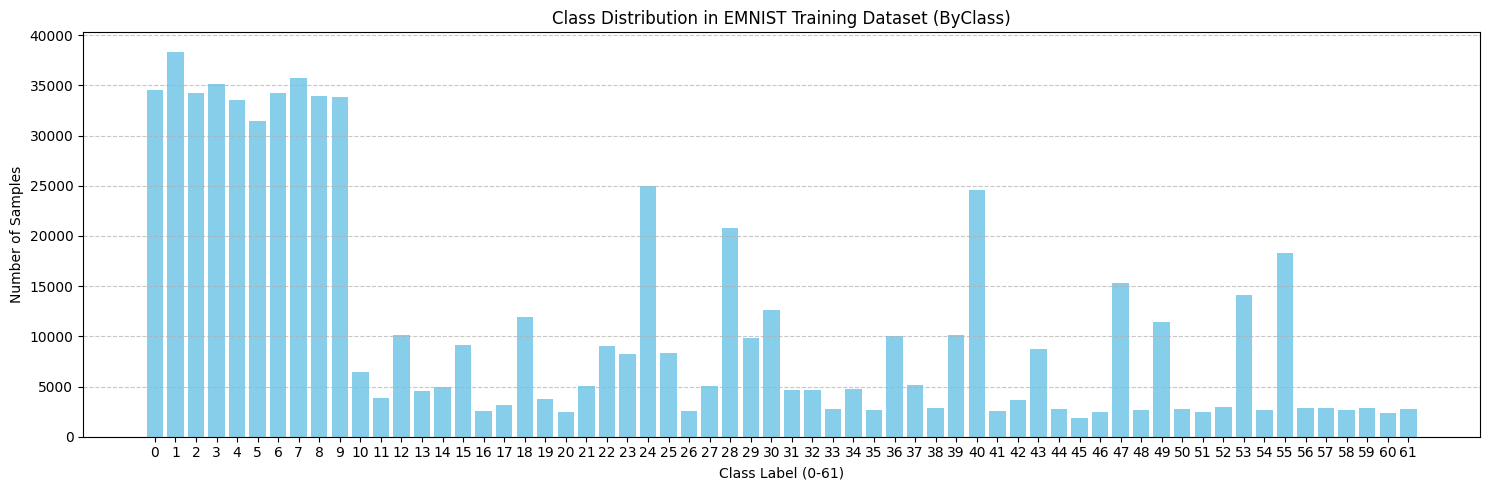

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Get labels from the dataset
labels = train_dataset.targets.numpy()

# Count occurrences of each class
label_counts = Counter(labels)

# Plot class distribution
plt.figure(figsize=(15, 5))
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.xlabel("Class Label (0-61)")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in EMNIST Training Dataset (ByClass)")
plt.xticks(np.arange(62))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import torch
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision import datasets, transforms
import numpy as np
from collections import Counter

# Step 1: Load the dataset
transform = transforms.ToTensor()
train_dataset = datasets.EMNIST(root='./data', split='byclass', train=True, download=True, transform=transform)

# Step 2: Count the number of samples per class
targets = train_dataset.targets.numpy()
class_counts = Counter(targets)

# Step 3: Compute weights (inverse frequency)
class_weights = {cls: 1.0 / count for cls, count in class_counts.items()}
sample_weights = [class_weights[label] for label in targets]
sample_weights = torch.DoubleTensor(sample_weights)

# Step 4: Create WeightedRandomSampler
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# Step 5: Create DataLoader with sampler
train_loader = DataLoader(train_dataset, batch_size=128, sampler=sampler)


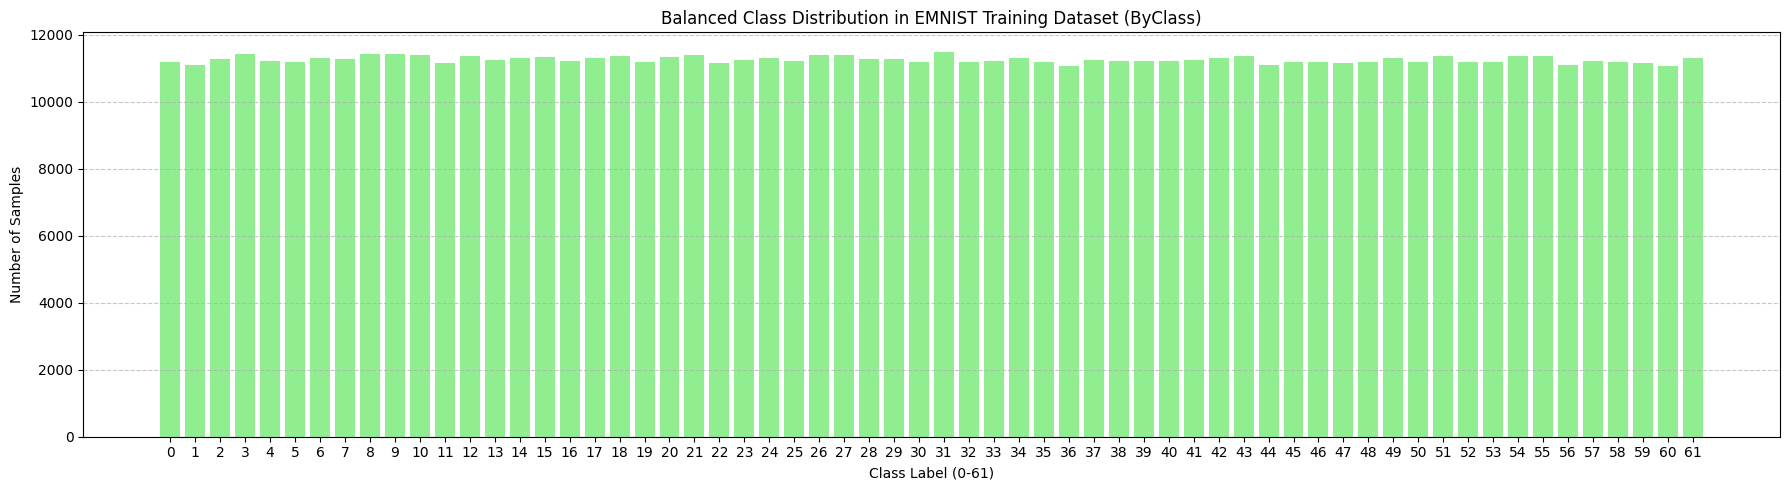

In [73]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import WeightedRandomSampler, DataLoader
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Load EMNIST ByClass
transform = transforms.ToTensor()
emnist_train = datasets.EMNIST(root='./data', split='byclass', train=True, download=True, transform=transform)
targets = emnist_train.targets

# Compute class frequencies
class_counts = Counter(targets.numpy())
num_samples = sum(class_counts.values())
num_classes = len(class_counts)

# Compute weights for each class: inverse of class frequency
weights = 1. / torch.tensor([class_counts[t.item()] for t in targets], dtype=torch.float)
sampler = WeightedRandomSampler(weights, num_samples=len(targets), replacement=True)

# Create a balanced DataLoader
balanced_loader = DataLoader(emnist_train, batch_size=1024, sampler=sampler)

# Estimate balanced distribution (simulate one full epoch of sampling)
balanced_counts = [0] * num_classes
for images, labels in balanced_loader:
    for label in labels:
        balanced_counts[label.item()] += 1

# Plotting
plt.figure(figsize=(18, 5))
plt.bar(range(num_classes), balanced_counts, color='lightgreen')
plt.title("Balanced Class Distribution in EMNIST Training Dataset (ByClass)")
plt.xlabel("Class Label (0-61)")
plt.ylabel("Number of Samples")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(num_classes))
plt.tight_layout()
plt.show()


#checking for missing or null values in full dataset

In [74]:
import torch
from torchvision import datasets, transforms

# Define transformation
transform = transforms.Compose([transforms.ToTensor()])

# Load the train and test datasets
train_dataset = datasets.EMNIST(root='./data', split='byclass', train=True, download=True, transform=transform)
test_dataset = datasets.EMNIST(root='./data', split='byclass', train=False, download=True, transform=transform)

# Combine datasets
full_dataset = train_dataset + test_dataset

# ✅ Find number of rows and columns
num_rows = len(full_dataset)  # Total number of samples
sample_data, _ = full_dataset[0]  # Take one sample to find shape
num_columns = sample_data.numel()  # Flattened number of pixels (channels × height × width)

print(f"Number of rows (samples): {num_rows}")
print(f"Number of columns (features per sample): {num_columns}")

# Check for missing or invalid values
for i, (data, label) in enumerate(full_dataset):
    if torch.isnan(data).any() or torch.isinf(data).any() or label is None:
        print(f"Missing or invalid value found at index {i}")
        break
else:
    print("No missing or invalid values found.")


Number of rows (samples): 814255
Number of columns (features per sample): 784
No missing or invalid values found.


In [75]:
# Find number of rows and columns in training dataset
num_rows = len(train_dataset)  # Total number of samples
sample_data, _ = train_dataset[0]  # Take one sample to find shape
num_columns = sample_data.numel()  # Flattened number of pixels (channels × height × width)

print(f"Number of rows in training dataset: {num_rows}")
print(f"Number of columns in training dataset: {num_columns}")

# Find number of rows and columns in testing dataset
num_rows = len(test_dataset)  # Total number of samples
sample_data, _ = test_dataset[0]  # Take one sample to find shape
num_columns = sample_data.numel()  # Flattened number of pixels (channels × height × width)

print(f"Number of rows in testing dataset: {num_rows}")
print(f"Number of columns in testing dataset: {num_columns}")

Number of rows in training dataset: 697932
Number of columns in training dataset: 784
Number of rows in testing dataset: 116323
Number of columns in testing dataset: 784


## Reduce size:

In [76]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Subset
from torch.utils.data import random_split
#small_train_dataset = Subset(train_dataset, range(90000))
#small_test_dataset = Subset(test_dataset, range(5000))

# ✅ Randomly split training samples
small_train_dataset, _ = random_split(train_dataset, [50000, len(train_dataset) - 50000])

# ✅ Randomly split testing samples
small_test_dataset, _ = random_split(test_dataset, [2000, len(test_dataset) - 2000])

# Print reduced dataset sizes
print(f"Reduced training dataset size: {len(small_train_dataset)} samples")
print(f"Reduced testing dataset size: {len(small_test_dataset)} samples")

# Check a sample shape
sample_data, sample_label = small_train_dataset[0]
print(f"Sample shape: {sample_data.shape} => Flattened: {sample_data.numel()} pixels")


Reduced training dataset size: 50000 samples
Reduced testing dataset size: 2000 samples
Sample shape: torch.Size([1, 28, 28]) => Flattened: 784 pixels


#remove duplicates values , if any

In [77]:
import pandas as pd

# Extract data and labels from the original EMNIST dataset using the indices from small_train_dataset and small_test_dataset
train_data = train_dataset.data[small_train_dataset.indices]
train_labels = train_dataset.targets[small_train_dataset.indices]

test_data = test_dataset.data[small_test_dataset.indices]
test_labels = test_dataset.targets[small_test_dataset.indices]

# Convert the small datasets into DataFrames for easy manipulation
df_train = pd.DataFrame(train_data.numpy().reshape(-1, 784))  # Reshape the data into 784 columns (flattened images)
df_train['label'] = train_labels.numpy()  # Add the labels

df_test = pd.DataFrame(test_data.numpy().reshape(-1, 784))  # Reshape the data into 784 columns (flattened images)
df_test['label'] = test_labels.numpy()  # Add the labels

# Remove duplicates
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

# Print confirmation
print("Removed duplicate rows (if any).")


Removed duplicate rows (if any).


In [78]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64
    transforms.ToTensor()  # Convert images to tensors
])

train_dataset = datasets.EMNIST(root='./data', split='byclass', train=True, download=True, transform=transform)
test_dataset = datasets.EMNIST(root='./data', split='byclass', train=False, download=True, transform=transform)


## normaliza data

In [79]:
# ✅ Normalize pixel values (0 to 1 range)
df_train.iloc[:, 1:] = df_train.iloc[:, 1:] / 255.0  # Normalize all pixel columns
df_test.iloc[:, 1:] = df_test.iloc[:, 1:] / 255.0
# ✅ Print only the first 5 rows to verify
#print("Sample Training Data (First 5 Rows):\n", df_train.head())
#print("✅ Data Normalized: Pixel values are now between 0 and 1.")


C:\Users\91739\AppData\Local\Temp\ipykernel_14888\3721181728.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49995    0.0
49996    0.0
49997    0.0
49998    0.0
49999    0.0
Name: 1, Length: 50000, dtype: float64' has dtype incompatible with uint8, please explicitly cast to a compatible dtype first.
  df_train.iloc[:, 1:] = df_train.iloc[:, 1:] / 255.0  # Normalize all pixel columns
C:\Users\91739\AppData\Local\Temp\ipykernel_14888\3721181728.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49995    0.0
49996    0.0
49997    0.0
49998    0.0
49999    0.0
Name: 2, Length: 50000, dtype: float64' has dtype incompatible with uint8, please explicitly cast to a compatible dtype first.
  df_

# Step 1: Prepare Data for CNN Model
CNNs need image data in shape (28, 28, 1) (not flattened). So, let’s reshape it:

In [115]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Access the original EMNIST dataset inside the Subset object
x_train = small_train_dataset.dataset.data[small_train_dataset.indices].numpy().reshape(-1, 28, 28, 1)  # Reshape the data into 28x28 images with 1 channel
y_train = small_train_dataset.dataset.targets[small_train_dataset.indices].numpy()  # Get the labels

x_test = small_test_dataset.dataset.data[small_test_dataset.indices].numpy().reshape(-1, 28, 28, 1)  # Reshape the data into 28x28 images with 1 channel
y_test = small_test_dataset.dataset.targets[small_test_dataset.indices].numpy()  # Get the labels

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=62)
y_test = to_categorical(y_test, num_classes=62)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (50000, 28, 28, 1)
y_train shape: (50000, 62)
x_test shape: (2000, 28, 28, 1)
y_test shape: (2000, 62)


# define a simple cnn model

In [132]:
from tensorflow.keras import regularizers
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Activation, Flatten
from tensorflow.keras.optimizers import Adam

# Set Learning Rate
learning_rate = 0.001
l2_reg = 1e-6  # L2 regularization factor

# Input Layer
input_layer = Input(shape=(28, 28, 1))

# 1st Convolution Block
x = Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_reg))(input_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# 2nd Convolution Block
x = Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# 3rd Convolution Block
x = Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# 4th Convolution Block
x = Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flattening
x = Flatten()(x)

# Dense Layers with L2 + Dropout
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = Dropout(0.2)(x)

x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = Dropout(0.5)(x)

# Output Layer
output_layer = Dense(62, activation='softmax', kernel_regularizer=regularizers.l2(l2_reg))(x)

# Build & Compile Model
model = Model(inputs=input_layer, outputs=output_layer)
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 62)             │         4,03

 Total params: 281,726 (1.07 MB)

 Trainable params: 280,958 (1.07 MB)

 Non-trainable params: 768 (3.00 KB)

In [133]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

# TensorFlow data augmentation (alternative to PyTorch augmentation)
datagen = ImageDataGenerator(
    #rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    #shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    vertical_flip=False
)

# Reshape images into (B, 28, 28, 1) for TensorFlow input
x_train = small_train_dataset.dataset.data[small_train_dataset.indices].numpy().reshape(-1, 28, 28, 1)
y_train = small_train_dataset.dataset.targets[small_train_dataset.indices].numpy()

x_test = small_test_dataset.dataset.data[small_test_dataset.indices].numpy().reshape(-1, 28, 28, 1)
y_test = small_test_dataset.dataset.targets[small_test_dataset.indices].numpy()

# Normalize the images to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=62)
y_test = to_categorical(y_test, num_classes=62)



# early stopping

In [134]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# train the model

In [136]:
from tensorflow.keras.callbacks import ReduceLROnPlateau


# Learning rate scheduler: reduce learning rate when the validation loss plateaus
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train

history = model.fit(x_train, y_train, epochs=12, batch_size=64, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 178s 285ms/step - accuracy: 0.5001 - loss: 2.0413 - val_accuracy: 0.7567 - val_loss: 0.7975 - learning_rate: 0.0010
Epoch 2/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 277ms/step - accuracy: 0.7209 - loss: 0.9153 - val_accuracy: 0.8088 - val_loss: 0.5808 - learning_rate: 0.0010
Epoch 3/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 235s 377ms/step - accuracy: 0.7659 - loss: 0.7385 - val_accuracy: 0.8094 - val_loss: 0.5772 - learning_rate: 0.0010
Epoch 4/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 208s 332ms/step - accuracy: 0.7806 - loss: 0.6576 - val_accuracy: 0.8236 - val_loss: 0.5345 - learning_rate: 0.0010
Epoch 5/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 264s 422ms/step - accuracy: 0.8031 - loss: 0.5908 - val_accuracy: 0.8347 - val_loss: 0.5085 - learning_rate: 0.0010
Epoch 6/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 238s 380ms/step - accuracy: 0.8103 - loss: 0.5660 - val_accuracy: 0.8402 - val_loss: 0.4908 - learning_rate: 0.0010
Epoch 7/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 184s 294ms/step - accura

# prediction

In [138]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step


In [140]:
# Function to convert class index to character
def emnist_class_to_char(index):
    if 0 <= index <= 9:
        return chr(ord('0') + index)          # '0' to '9'
    elif 10 <= index <= 35:
        return chr(ord('A') + index - 10)     # 'A' to 'Z'
    elif 36 <= index <= 61:
        return chr(ord('a') + index - 36)     # 'a' to 'z'
    else:
        return '?'                            # Out of range

# ✅ Extract image and label
index = 987
image = x_test[index]
label_index = np.argmax(y_test[index])  # Get class index
label_char = emnist_class_to_char(label_index)

# ✅ Prepare image for prediction
image_input = np.expand_dims(image, axis=0)

# ✅ Predict class
prediction = model.predict(image_input)
predicted_index = np.argmax(prediction)
predicted_char = emnist_class_to_char(predicted_index)

# ✅ Print results
print(f"Actual Label: {label_char} (Index: {label_index})")
print(f"Predicted Label: {predicted_char} (Index: {predicted_index})")

# ✅ Check correctness
if predicted_index == label_index:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Actual Label: S (Index: 28)
Predicted Label: S (Index: 28)
Prediction is correct!


# testing for unseen data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


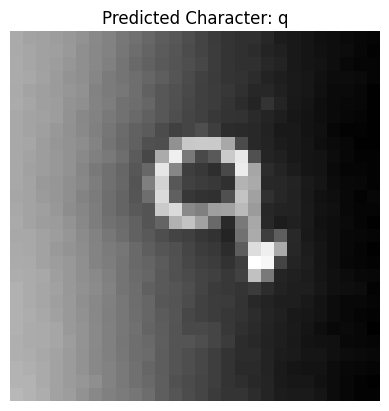

Predicted class index: 52
Predicted character: q


In [171]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Function to convert class index to character (EMNIST Balanced)
def emnist_class_to_char(index):
    if 0 <= index <= 9:
        return chr(ord('0') + index)          # '0' to '9'
    elif 10 <= index <= 35:
        return chr(ord('A') + index - 10)     # 'A' to 'Z'
    elif 36 <= index <= 61:
        return chr(ord('a') + index - 36)     # 'a' to 'z'
    else:
        return '?'                            # Out of range

# Load the trained model
model = tf.keras.models.load_model('model4.h5')  # Replace with your actual model path

# Load and preprocess the image
img_path = r'C:\MLOps_PRACTICAL\project_mlops_emnist\test_image\q.jpg'  # Replace with the path to your image
img = Image.open(img_path).convert('L')  # Convert to grayscale
img = img.resize((28, 28))               # Resize to 28x28
img = np.array(img)                      # Convert to numpy array
img = 255 - img                          # Invert (EMNIST uses white on black)
img = img / 255.0                        # Normalize to 0-1


img = img.reshape(1, 28, 28, 1)          # Reshape for model input

# Make actual prediction using the model
prediction = model.predict(img)
predicted_class = np.argmax(prediction)
predicted_label = emnist_class_to_char(predicted_class)

# Display the result
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Character: {predicted_label}')
plt.axis('off')
plt.show()

# Display prediction details
print(f"Predicted class index: {predicted_class}")
print(f"Predicted character: {predicted_label}")

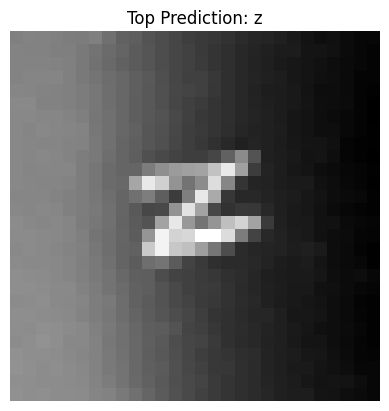

In [169]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Function to convert class index to character (EMNIST Balanced)
def emnist_class_to_char(index):
    if 0 <= index <= 9:
        return chr(ord('0') + index)
    elif 10 <= index <= 35:
        return chr(ord('A') + index - 10)
    elif 36 <= index <= 61:
        return chr(ord('a') + index - 36)
    else:
        return '?'

# Load and preprocess the image
img_path = r'C:\Users\91739\Downloads\z.jpg'
img = Image.open(img_path).convert('L')
img = img.resize((28, 28))
img = np.array(img)
img = 255 - img
img = img / 255.0
img = img.reshape(1, 28, 28, 1)
num_classes = 62
prediction = np.full((num_classes,), 1.0 / num_classes)



# Display the image
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f'Top Prediction: {emnist_class_to_char(top_indices[0])}')
plt.axis('off')
plt.show()



In [26]:
model.save('model1.h5')

In [27]:
model.save('model2.h5')

In [28]:
model.save('model3.h5')

In [29]:
model.save('model4.h5')

In [107]:
model.save('model5.h5')

In [152]:
model.save('model6.h5')